# **Resume Analyzer**

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/UpdatedResumeDataSet.csv')

In [ ]:
df.head(100)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
95,Advocate,"Education Details \r\n B.Com, LL.B., Univers..."
96,Advocate,Education Details \r\n LLB. Dibrugarh Univer...
97,Advocate,Education Details \r\nNovember 2016 to January...
98,Advocate,SKILLS â¢ Knows English as native speaker (IE...


In [ ]:
df["Category"].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<Axes: xlabel='count', ylabel='Category'>

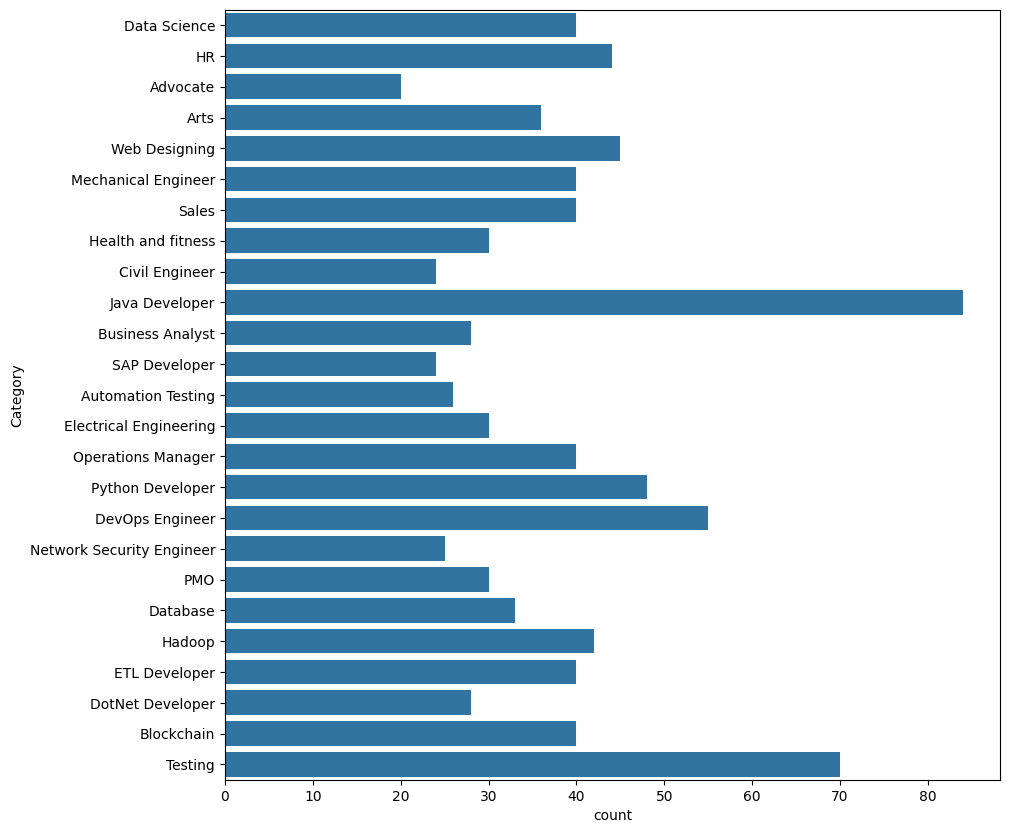

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['Category'])

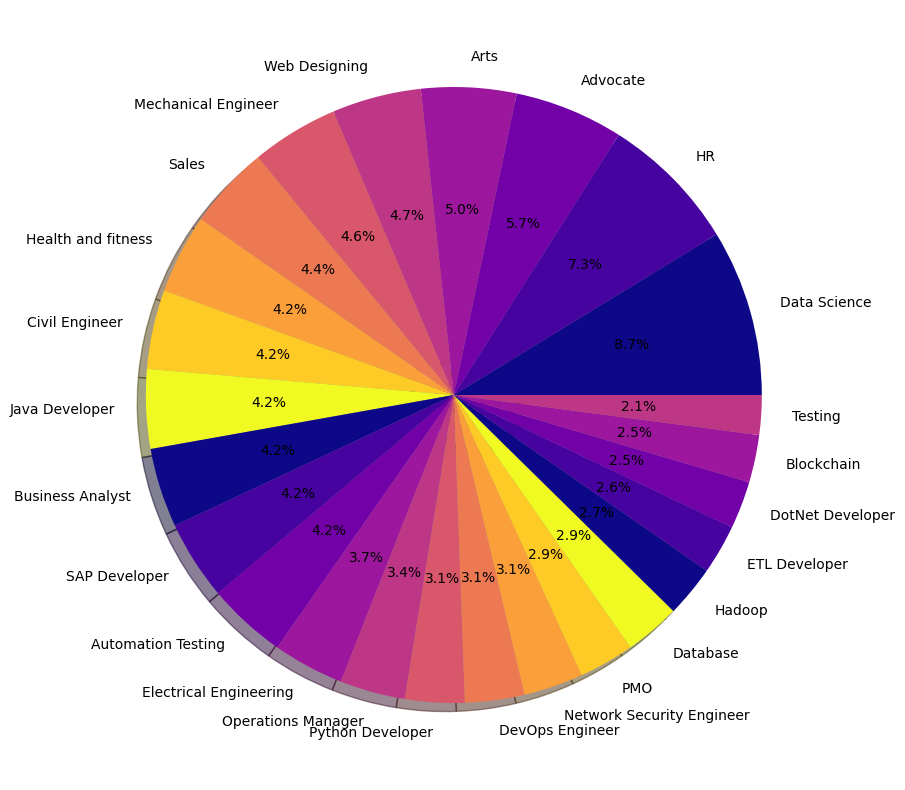

In [ ]:
plt.figure(figsize=(15,10))
counts=df['Category'].value_counts()
Labels=df['Category'].unique()
plt.pie(counts,labels=Labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,10)))
plt.show()

# Cleaning Data
URL's

hashtag

mention

special letter

Punctuations

In [ ]:
import re
def cleanResume(txt):
  cleantxt=re.sub('http\S+\s',' ',txt)
  cleantxt=re.sub('@\S+',' ',cleantxt)
  cleantxt=re.sub('#\S+'," ",cleantxt)
  cleantxt=re.sub('RT|CC',' ',cleantxt)
  cleantxt = re.sub(r'[!"#&%\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', cleantxt)
  cleantxt=re.sub('[^a-zA-Z]',' ',cleantxt)
  cleantxt=re.sub('\s+',' ',cleantxt)
  cleantxt=cleantxt.lower()

  return cleantxt

In [ ]:
cleanResume("my Website #### #ank link cgpa:6  ;ank is this http://ank.com and it is working @ank.com")

'my website link cgpa ank is this and it is working '

In [ ]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
df["Resume"]=df["Resume"].apply(lambda x:cleanResume(x))
df["Resume"][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in accelerating the review proc

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
le=LabelEncoder()

In [ ]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df["Resume"])
requredtext=tfidf.transform(df["Resume"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(requredtext,df["Category"],test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
ypred=clf.predict(x_test)
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [ ]:
clf.score(x_test,y_test)

0.9844559585492227

In [ ]:
myresume="""I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

#pred(myresume)

In [ ]:
df["Resume"][98]

'skills knows english as native speaker ielts overall listening reading writing and speaking hindi with bilingual proficiency and punjabi as native speaker able to communicate clearly and concisely with people of diverse backgrounds and levels of authority exceptional knowledge of administrative procedures evidence rules and trials can maintain a professional attitude with peers co workers and clients at all times focused and driven to always meet deadlines for pretrial procedures trials and appellate briefings by effectively utilizing resources a microsoft certified systems engineer and very much competent in windows and word processing software education details july to may bachelor s laws bikaner rajasthan maharaja ganga singh university august to november microsoft certified systems engineer networking chandigarh july to april bachelor s of science bio informatics chandigarh chandigarh panjab university advocate newcomer indian advocate skill details administration exprience months

In [ ]:
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [ ]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00         8
          17       1.00    

In [ ]:
print(confusion_matrix(y_test,ypred))

[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:

import pickle
clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(myresume)

input_features=tfidf.transform([cleaned_resume])

prediction_id=clf.predict(input_features)[0]
category_mapping = {
    6: "Data Science",
    12: "HR",
    0: "Advocate",
    1: "Arts",
    24: "Web Designing",
    16: "Mechanical Engineer",
    22: "Sales",
    14: "Health and fitness",
    5: "Civil Engineer",
    15: "Java Developer",
    4: "Business Analyst",
    21: "SAP Developer",
    2: "Automation Testing",
    11: "Electrical Engineering",
    18: "Operations Manager",
    20: "Python Developer",
    8: "DevOps Engineer",
    17: "Network Security Engineer",
    19: "PMO",
    7: "Database",
    13: "Hadoop",
    10: "ETL Developer",
    9: "DotNet Developer",
    3: "Blockchain",
    23: "Testing"
}


category_name=category_mapping.get(prediction_id,"Unknown")
print("Predicted Category ",category_name)

print(prediction_id)

Predicted Category  Data Science
6
